Report about usage statistics of UHH2 ntuples.

In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = (10, 6)

In [5]:
pd.options.display.max_colwidth = 200
pd.options.display.float_format = lambda x : "%4.2f" % x

In [89]:
def get_user_from_filename(ntuple_filename):
    """Get username from full filepath

    Assumes it comes after .../user/
    e.g. :
    get_user_from_filename("/nfs/dust/cms/user/robin/UHH2/Ntuple_2016v2.root")
    >> robin

    Parameters
    ----------
    ntuple_filename : str

    Returns
    -------
    str
        Username, or None if not found
    """
    if "/user/" not in ntuple_filename:
        return ''
    parts = ntuple_filename.split("/")
    ind = parts.index("user")
    if ind == len(parts)-1:
        return ''
    return parts[ind+1]

In [91]:
# Load dataset - CHANGE FILENAME AS APPLICABLE
def get_dataframe(csv_filename, year=None):
    this_df = pd.read_csv(csv_filename, index_col=0, low_memory=False)

    # remove double slashes
    this_df['ntuple'] = this_df['ntuple'].str.replace('//', '/', regex=False)
    # redo user
    this_df['user'] = this_df['ntuple'].map(lambda x: get_user_from_filename(x))
    
    # cast certain columns as Categorical type to save space/time
    this_df.loc[this_df['user'].str.match('karavdia'), 'user'] = 'akaravdi' # relabel anastasia's other username
    this_df['user'] = this_df['user'].astype('category')
    this_df['xmldir'] = this_df['xmldir'].astype('category')
    if year:
        this_df['year'] = year
    this_df['year'] = this_df['year'].astype('category')
    this_df['isdata'] = this_df['ntuple'].str.contains('DATA_')

    # Try and figure out which dataset file come from:
    this_df['dataset'] = np.nan
    # this is the recommended way to set values based on value of another column
    this_df.loc[this_df['ntuple'].str.contains('_JetHT'), 'dataset'] = 'JetHT'
    this_df.loc[this_df['ntuple'].str.contains('_SingleMu'), 'dataset'] = 'SingleMu'
    this_df.loc[this_df['ntuple'].str.contains('_EGamma'), 'dataset'] = 'EGamma'
    this_df.loc[this_df['ntuple'].str.contains('_MET'), 'dataset'] = 'MET'
    this_df.loc[this_df['ntuple'].str.contains('_SingleElectron'), 'dataset'] = 'SingleElectron'
    this_df.loc[this_df['ntuple'].str.contains('_SinglePhoton'), 'dataset'] = 'SinglePhoton'
    this_df['dataset'] = this_df['dataset'].astype('category')
    
    return this_df

In [92]:
df = get_dataframe("datasetinfo_102X_10_7_19.csv")

In [93]:
df.head()

,ntuple,size,user,xmldir,year,isdata,dataset
0,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,514.20,drberry,2018,2018,False,NaN
1,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,503.68,drberry,2018,2018,False,NaN
2,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,554.39,drberry,2018,2018,False,NaN
3,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,504.66,drberry,2018,2018,False,NaN
4,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,504.46,drberry,2018,2018,False,NaN


In [53]:
df.dtypes

ntuple       object
size        float64
user       category
xmldir     category
year       category
isdata         bool
dataset    category
dtype: object

In [102]:
df_102X = get_dataframe("datasetinfo_102X_10_7_19.csv")
df_94v1 = get_dataframe("datasetinfo_94v1_10_7_19.csv", "2017_94v1")
df_94v2 = get_dataframe("datasetinfo_94v2_10_7_19.csv", "2017_94v2")
df_94v3 = get_dataframe("datasetinfo_94v3_10_7_19.csv", "2017_94v3")
df_80v3 = get_dataframe("datasetinfo_80v3_10_7_19.csv", "2016_80v3")
df_80v3_egreg = get_dataframe("datasetinfo_80v3_EGReg_10_7_19.csv", "2016_80v3_egreg")
df_80v5 = get_dataframe("datasetinfo_80v5_10_7_19.csv", "2016_80v5")
df_94v1_woHOTVR_woXCone = get_dataframe("datasetinfo_94v1_woHOTVR_woXCone_10_7_19.csv", "2017_94v1_woHOTVRXCone")

In [103]:
df_total = pd.concat([df_102X, df_94v1, df_94v2, df_94v3, df_80v3, df_80v3_egreg, df_80v5, df_94v1_woHOTVR_woXCone], ignore_index=True)

In [54]:
total_size_mb = df['size'].sum()
MB_TO_TB = 1024*1024.

In [104]:
print('102X: %.3f TB ' % (df_102X['size'].sum() / MB_TO_TB))
print('94v1: %.3f TB ' % (df_94v1['size'].sum() / MB_TO_TB))
print('94v2: %.3f TB ' % (df_94v2['size'].sum() / MB_TO_TB))
print('94v3: %.3f TB ' % (df_94v3['size'].sum() / MB_TO_TB))
print('80v3: %.3f TB ' % (df_80v3['size'].sum() / MB_TO_TB))
print('80v3_egreg: %.3f TB ' % (df_80v3_egreg['size'].sum() / MB_TO_TB))
print('80v5: %.3f TB ' % (df_80v5['size'].sum() / MB_TO_TB))
print('94v1_woHOTVR_woXCone: %.3f TB ' % (df_94v1_woHOTVR_woXCone['size'].sum() / MB_TO_TB))
print("")
print("TOTAL: %.3f TB" % (df_total['size'].sum() / MB_TO_TB))

102X: 117.017 TB 
94v1: 3.174 TB 
94v2: 10.038 TB 
94v3: 0.485 TB 
80v3: 42.762 TB 
80v3_egreg: 0.284 TB 
80v5: 17.759 TB 
94v1_woHOTVR_woXCone: 10.075 TB 

TOTAL: 201.593 TB


## General stats

In [118]:
print(len(df_total.index), "files")

1240152 files


In [119]:
print("Total size of all ntuples: %.3f TB" % (total_size_mb / MB_TO_TB))
# NB be careful - don't access with df.size as calls internal size!

Total size of all ntuples: 201.593 TB


In [120]:
n_users = df_total['user'].nunique()

In [121]:
print('Average space used per user (%d): %.3f TB' % (n_users, total_size_mb / (MB_TO_TB * n_users)))

Average space used per user (25): 8.064 TB


In [122]:
print("Statistics for ntuple filesizes:")
df_total['size'].describe()

Statistics for ntuple filesizes:


count   1240152.00
mean        170.45
std         162.16
min           0.01
25%          76.18
50%         137.90
75%         206.48
max        3808.24
Name: size, dtype: float64

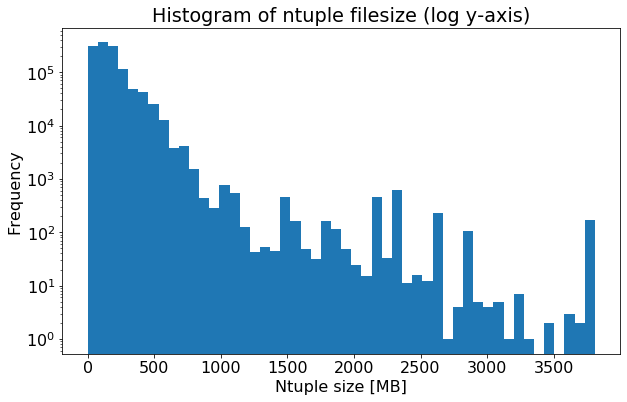

In [124]:
df_total['size'].plot(kind='hist', bins=50);
plt.xlabel('Ntuple size [MB]');
plt.yscale('log');
plt.title("Histogram of ntuple filesize (log y-axis)");

## Split by user

In [117]:
print(df_total['user'].nunique(), "unique users")

25 unique users


In [115]:
print("Total space usage per user [TB]:")
usage_user = df_total.groupby('user')['size'].sum().sort_values(ascending=False) / MB_TO_TB
print(usage_user)

Total space usage per user [TB]:
user
akaravdi   66.95
raggleto   16.70
drberry    14.58
rkogler    13.59
jmulthau   12.83
salbrech   11.63
pgunnell   11.11
deschwar   10.83
todreyer    8.86
tiroy       5.44
izoi        5.43
peiffer     4.49
dagonzal    3.91
cgarbers    3.47
anmalara    2.85
cmatthie    2.44
afroehli    1.97
sschuman    1.47
alschmid    1.35
areimers    1.22
abenecke    0.16
aggleton    0.15
xuchen      0.12
mstoever    0.05
isandova    0.02
Name: size, dtype: float64


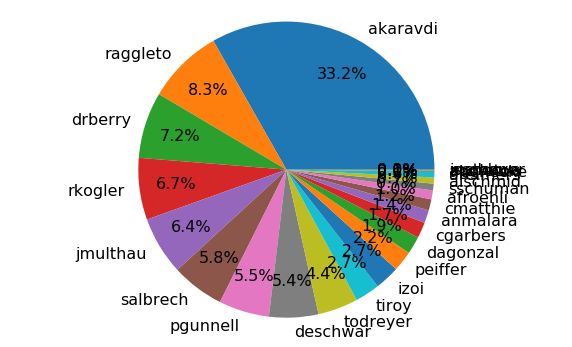

In [116]:
plt.pie(usage_user, labels=usage_user.index.tolist(), autopct="%.1f%%", labeldistance=1.1, pctdistance=0.75);
plt.gca().axis('equal');

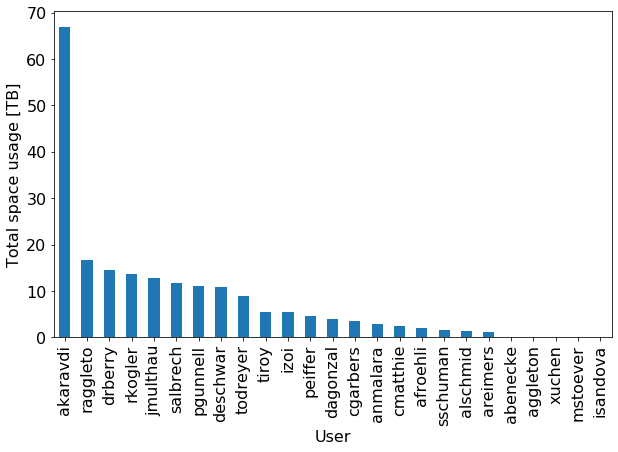

In [127]:
usage_user.plot(kind='bar');
plt.xlabel('User');
plt.ylabel('Total space usage [TB]');

In [114]:
print("% space usage by user:")
100 * df_total.groupby('user')['size'].sum().sort_values(ascending=False) / total_size_mb

% space usage by user:


user
akaravdi   33.21
raggleto    8.28
drberry     7.23
rkogler     6.74
jmulthau    6.37
salbrech    5.77
pgunnell    5.51
deschwar    5.37
todreyer    4.40
tiroy       2.70
izoi        2.69
peiffer     2.23
dagonzal    1.94
cgarbers    1.72
anmalara    1.41
cmatthie    1.21
afroehli    0.98
sschuman    0.73
alschmid    0.67
areimers    0.61
abenecke    0.08
aggleton    0.07
xuchen      0.06
mstoever    0.02
isandova    0.01
Name: size, dtype: float64

In [112]:
print('# files per user:')
df_total.user.value_counts()

# files per user:


akaravdi    366425
deschwar    127518
drberry      99898
todreyer     99046
pgunnell     86195
raggleto     68497
cgarbers     52151
rkogler      50410
salbrech     41546
peiffer      34501
dagonzal     33787
jmulthau     33207
cmatthie     32530
sschuman     24519
izoi         21890
afroehli     18749
tiroy        16209
anmalara     11209
areimers     10789
alschmid      8556
aggleton       905
abenecke       849
isandova       393
xuchen         245
mstoever       128
Name: user, dtype: int64

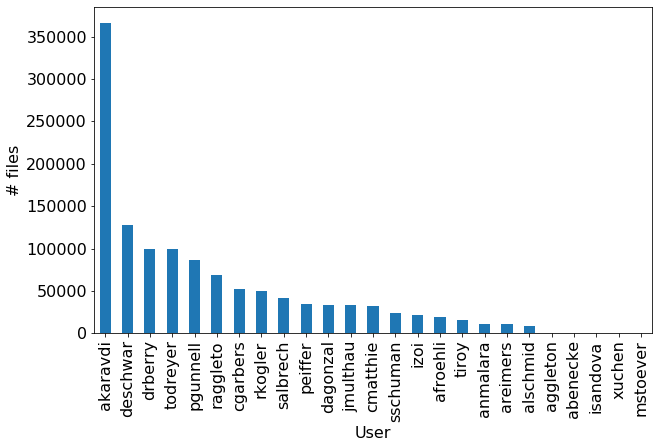

In [113]:
df_total.user.value_counts().plot(kind='bar');
plt.xlabel('User');
plt.ylabel('# files');

## Split by dataset year

In [107]:
print('Total space usage per dataset year [TB]:')
df_total.groupby('year')['size'].sum() / MB_TO_TB

Total space usage per dataset year [TB]:


year
2016_80v3                42.76
2016_80v3_egreg           0.28
2016_80v5                17.76
2016v2                    0.75
2016v3                   46.27
2017                     20.95
2017_94v1                 3.17
2017_94v1_woHOTVRXCone   10.07
2017_94v2                10.04
2017_94v3                 0.49
2018                     49.04
Name: size, dtype: float64

In [108]:
print('% space usage per dataset year:')
100. * df_total.groupby('year')['size'].sum() / total_size_mb

% space usage per dataset year:


year
2016_80v3                21.21
2016_80v3_egreg           0.14
2016_80v5                 8.81
2016v2                    0.37
2016v3                   22.95
2017                     10.39
2017_94v1                 1.57
2017_94v1_woHOTVRXCone    5.00
2017_94v2                 4.98
2017_94v3                 0.24
2018                     24.33
Name: size, dtype: float64

In [109]:
print("# files per dataset year:")
df_total['year'].value_counts()

# files per dataset year:


2016_80v3                 324289
2018                      204694
2016_80v5                 197234
2016v3                    130926
2017_94v1_woHOTVRXCone    118522
2017                      111112
2017_94v2                  94029
2017_94v1                  48761
2016_80v3_egreg             3900
2016v2                      3701
2017_94v3                   2984
Name: year, dtype: int64

## Split by data/MC

In [110]:
print('Total space used per data/MC [TB]:')
df_total.groupby('isdata')['size'].sum() / MB_TO_TB

Total space used per data/MC [TB]:


isdata
False   156.05
True     45.54
Name: size, dtype: float64

In [111]:
print('Total space used per primary dataset [TB]:')
df_total[df_total['isdata']].groupby('dataset')['size'].sum() / MB_TO_TB

Total space used per primary dataset [TB]:


dataset
EGamma     11.43
JetHT      26.18
SingleMu    6.64
Name: size, dtype: float64